# Closeness centrality

## Langkah 1: Crawl data judul berita dan isi berita dari https://tribunjatim.co/

## Aparat Keamanan

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_article_content(article_url):
    response = requests.get(article_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        article_content = soup.find('div', class_='single-wrap').find_all('p')
        content = '\n'.join([p.get_text() for p in article_content])
        return content
    return ""

def scrape_news_data(start_date, end_date):
    base_url = "https://tribunjatim.co/indeks/?dy={}&mt={}&yr={}"
    data = []

    current_date = start_date
    while current_date <= end_date:
        url = base_url.format(current_date.day, current_date.month, current_date.year)
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            news_elements = soup.find_all('h2', class_='entry-title')

            for element in news_elements:
                title = element.a.text
                article_url = element.a['href']
                content = get_article_content(article_url)

                data.append({'Date': current_date.strftime('%d-%m-%Y'), 'Title': title, 'Content': content})

            current_date += timedelta(days=1)
        else:
            print(f"Failed to fetch data for {current_date.strftime('%d-%m-%Y')}")

    return data

from datetime import date, timedelta
start_date = date(2023, 10, 1)
end_date = date(2023, 10, 10)

news_data = scrape_news_data(start_date, end_date)


In [2]:
# Create a pandas DataFrame from the scraped data
df = pd.DataFrame(news_data)


In [3]:
df['Title'] = df['Title'].str.replace('\n', '')

In [4]:
df['Label'] = 'Aparat Keamanan'


In [5]:
df

,Date,Title,Content,Label
0,01-10-2023,Ide Kreatif Babinsa Koramil Ngetos Ikut Serta ...,Nganjuk – Tribunajatim.co – Babinsa Koramil 1...,Aparat Keamanan
1,01-10-2023,"TNI Gadungan Perdaya Kekasih di Nganjuk, Korba...",Nganjuk – Tribunjatim.co – Aparat Kepolisian S...,Aparat Keamanan
2,01-10-2023,BMKG Klarifikasi Kabar Suhu Panas Tembus 42 De...,Surabaya – tribunjatim.co – Badan Meteorologi...,Aparat Keamanan
3,01-10-2023,"Peduli Remaja,Bati Komsos Koramil 0804/01 Mage...",Magetan-Bati Komsos Koramil 0804/01 Magetan P...,Aparat Keamanan
4,01-10-2023,Babinsa Koramil Tipe B 0804/01 Magetan Hadiri ...,Magetan. tribunjatim.co-Babinsa Koramil 0804/0...,Aparat Keamanan
...,...,...,...,...
94,10-10-2023,"Sinergitas Antara TNI, Polri Dan Satpol-PP Ama...",Magetan.tribunjatim.co – Koramil Tipe B 0804/0...,Aparat Keamanan
95,10-10-2023,Kodim 0802/Ponorogo Gelar Syukuran HUT ke 78 T...,"\n \nPonorogo,-Kodim 0802/Ponorogo hari ini me...",Aparat Keamanan
96,10-10-2023,Babinsa Berikan Pelatihan PBB dan Materi Wawas...,\nMadiun – Satuan Linmas adalah warga masyara...,Aparat Keamanan
97,10-10-2023,Babinsa Dampingi Penyaluran Bantuan Pangan Dar...,\nMadiun – Pemerintah melalui PT Pos Indonesi...,Aparat Keamanan


In [6]:
# Save the DataFrame to a CSV file
df.to_csv('tribun.csv', index=False)

## Langkah 2: Meringkas Fitur Content(Spacy)

In [7]:
import pandas as pd

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data = pd.read_csv("/content/drive/MyDrive/ppw/tugas/data-tugas/tribun.csv")
data

,Date,Title,Content,Label
0,01-10-2023,Ide Kreatif Babinsa Koramil Ngetos Ikut Serta ...,Nganjuk – Tribunajatim.co – Babinsa Koramil 1...,Aparat Keamanan
1,01-10-2023,"TNI Gadungan Perdaya Kekasih di Nganjuk, Korba...",Nganjuk – Tribunjatim.co – Aparat Kepolisian S...,Aparat Keamanan
2,01-10-2023,BMKG Klarifikasi Kabar Suhu Panas Tembus 42 De...,Surabaya – tribunjatim.co – Badan Meteorologi...,Aparat Keamanan
3,01-10-2023,"Peduli Remaja,Bati Komsos Koramil 0804/01 Mage...",Magetan-Bati Komsos Koramil 0804/01 Magetan P...,Aparat Keamanan
4,01-10-2023,Babinsa Koramil Tipe B 0804/01 Magetan Hadiri ...,Magetan. tribunjatim.co-Babinsa Koramil 0804/0...,Aparat Keamanan
...,...,...,...,...
94,10-10-2023,"Sinergitas Antara TNI, Polri Dan Satpol-PP Ama...",Magetan.tribunjatim.co – Koramil Tipe B 0804/0...,Aparat Keamanan
95,10-10-2023,Kodim 0802/Ponorogo Gelar Syukuran HUT ke 78 T...,"\n \nPonorogo,-Kodim 0802/Ponorogo hari ini me...",Aparat Keamanan
96,10-10-2023,Babinsa Berikan Pelatihan PBB dan Materi Wawas...,\nMadiun – Satuan Linmas adalah warga masyara...,Aparat Keamanan
97,10-10-2023,Babinsa Dampingi Penyaluran Bantuan Pangan Dar...,\nMadiun – Pemerintah melalui PT Pos Indonesi...,Aparat Keamanan


In [10]:
#install library
!pip install sastrawi
!pip install swifter
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=22e7733183a9121dbb002fa1eecb5ee413ea203d0fc3734df0d16afd33e2f661
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [20]:
# Impor pustaka spaCy
import spacy

# Memuat model bahasa Inggris spaCy
nlp = spacy.load("en_core_web_sm")

# Berikan berita yang ingin diringkas
berita = data['Content'].iloc[4]

# Analisis teks menggunakan spaCy
doc = nlp(berita)

# Meringkas teks dengan mengekstrak kalimat-kalimat utama
kalimat_utama = [kalimat.text for kalimat in doc.sents]
ringkasan = " ".join(kalimat_utama[:5])  # Mengambil dua kalimat pertama sebagai ringkasan

# Cetak ringkasan
print(ringkasan)


Magetan. tribunjatim.co-Babinsa Koramil 0804/01 Magetan Serda Untung menghadiri pelaksanaan kegiatan Pelayanan Program KB dalam rangka Hari Kontrasepsi sedunia dengan jumlah peserta 9 orang bertempat di RSIA Samudra Husada jalan Samudra Kelurahan Bulukerto Kec. Magetan Kab. Magetan (01 Oktober 2023)
Kegiatan Pelayanan Program KB dalam rangka


## Langkah 3: TF IDF

In [21]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
kalimat = nltk.sent_tokenize(ringkasan)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(kalimat)

terms = tfidf_vectorizer.get_feature_names_out()

for i, sentence in enumerate(kalimat):
    print(f"\nKalimat {i+1}: {sentence}")
    for j, term in enumerate(terms):
        tfidf_value = tfidf_matrix[i, j]
        if tfidf_value > 0:
            print(f"{term}: {tfidf_value:.4f}")


Kalimat 1: Magetan.
magetan: 1.0000

Kalimat 2: tribunjatim.co-Babinsa Koramil 0804/01 Magetan Serda Untung menghadiri pelaksanaan kegiatan Pelayanan Program KB dalam rangka Hari Kontrasepsi sedunia dengan jumlah peserta 9 orang bertempat di RSIA Samudra Husada jalan Samudra Kelurahan Bulukerto Kec.
01: 0.1380
0804: 0.1751
babinsa: 0.1751
bertempat: 0.1751
bulukerto: 0.1751
co: 0.1751
dalam: 0.1380
dengan: 0.1751
di: 0.1751
hari: 0.1751
husada: 0.1751
jalan: 0.1751
jumlah: 0.1751
kb: 0.1380
kec: 0.1751
kegiatan: 0.1380
kelurahan: 0.1751
kontrasepsi: 0.1751
koramil: 0.1751
magetan: 0.0914
menghadiri: 0.1751
orang: 0.1751
pelaksanaan: 0.1751
pelayanan: 0.1380
peserta: 0.1751
program: 0.1380
rangka: 0.1380
rsia: 0.1751
samudra: 0.3502
sedunia: 0.1751
serda: 0.1751
tribunjatim: 0.1751
untung: 0.1751

Kalimat 3: Magetan Kab.
kab: 0.8865
magetan: 0.4626

Kalimat 4: Magetan (01 Oktober 2023)
Kegiatan Pelayanan Program KB dalam rangka
01: 0.3063
2023: 0.3886
dalam: 0.3063
kb: 0.3063
kegiatan:

## Langkah 4: Cosine Similarity

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

In [24]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

for i in range(len(kalimat)):
    for j in range(i+1, len(kalimat)):
        similarity = cosine_similarities[i][j]
        print(f"Similarity Kalimat {i+1} dan Kalimat {j+1}: {similarity:.4f}")

Similarity Kalimat 1 dan Kalimat 2: 0.0914
Similarity Kalimat 1 dan Kalimat 3: 0.4626
Similarity Kalimat 1 dan Kalimat 4: 0.2028
Similarity Kalimat 2 dan Kalimat 3: 0.0423
Similarity Kalimat 2 dan Kalimat 4: 0.3145
Similarity Kalimat 3 dan Kalimat 4: 0.0938


In [25]:
similarity_df = pd.DataFrame(cosine_similarities, columns=range(len(kalimat)), index=range(len(kalimat)))
similarity_df

,0,1,2,3
0,1.000000,0.091364,0.462637,0.202766
1,0.091364,1.000000,0.042268,0.314529
2,0.462637,0.042268,1.000000,0.093807
3,0.202766,0.314529,0.093807,1.000000


## Langkah 5: Graph

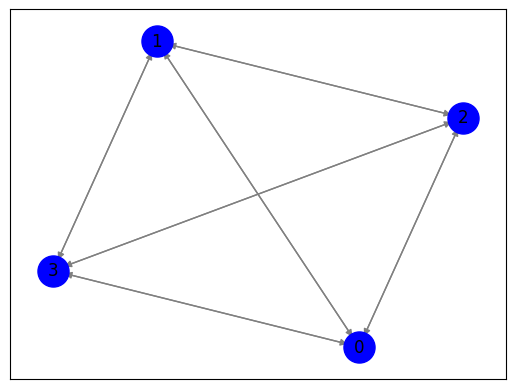

In [26]:
G = nx.DiGraph()
for i in range(len(cosine_similarities)):
    G.add_node(i)

for i in range(len(cosine_similarities)):
    for j in range(len(cosine_similarities)):
        similarity = cosine_similarities[i][j]
        if similarity > 0.02 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

## Langkah 6: Closeness Centrality

In [27]:
closeness_centrality = nx.closeness_centrality(G)

sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Closeness Centrality:")
for node, closeness in sorted_closeness:
    print(f"Node {node}: {closeness:.4f}")


Sorted Closeness Centrality:
Node 0: 1.0000
Node 1: 1.0000
Node 2: 1.0000
Node 3: 1.0000


In [28]:
print("\nNode Tertinggi dengan Kalimat:")
for node, closeness in sorted_closeness[:3]:
    top_sentence = kalimat[node]
    print(f"Node {node}: Closeness Centrality = {closeness:.4f}")
    print(f"Kalimat: {top_sentence}\n")


Node Tertinggi dengan Kalimat:
Node 0: Closeness Centrality = 1.0000
Kalimat: Magetan.

Node 1: Closeness Centrality = 1.0000
Kalimat: tribunjatim.co-Babinsa Koramil 0804/01 Magetan Serda Untung menghadiri pelaksanaan kegiatan Pelayanan Program KB dalam rangka Hari Kontrasepsi sedunia dengan jumlah peserta 9 orang bertempat di RSIA Samudra Husada jalan Samudra Kelurahan Bulukerto Kec.

Node 2: Closeness Centrality = 1.0000
Kalimat: Magetan Kab.

